In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import LogisticRegression

#Leemos los archivos del fichero

ciclistas = open ('/Users/34603/Desktop/TFG/Python/ciclistasVariablesSinNormalizarNiNombres.txt','r')
dataSet = list()
labels = list()

for linea in ciclistas: #Recorremos cada linea del archivo
    caracteristicas = linea.split()
    clase = 1 if caracteristicas[0] == "Profesional" else 0
    labels.append(clase)
    variables=[float(elemento) for elemento in caracteristicas[1:]]
    dataSet.append(variables)
dataSet=np.array(dataSet)
labels=np.array(labels)
num_variables = len(dataSet[0])
CC=np.linspace(0.01,2.0,20)
modelos= list()
accuracy = list()

#Se normalizan las variables
mu=np.mean(dataSet,axis=0)
sigma=np.std(dataSet,axis=0)
datasetNormalizado = ((dataSet-mu)/sigma)

#Precisión con cada variables para determinar las que mejor clasifican
for i in range(num_variables):
    data = datasetNormalizado[:,i:i+1]

    #se crean los conjunto de entrenamiento y de testeo con "leave-one-out"
    loo = LeaveOneOut()
    loo.get_n_splits(data)

    modelos = [LogisticRegression(penalty = 'l2', max_iter= 1000)]
    for modelo in modelos:
        precisionModelo= list()
        for train_index, test_index in loo.split(data):
            prediccion=modelo.fit(data[train_index],labels[train_index]).predict(data[test_index])
            if prediccion != labels[test_index]:
                precisionModelo.append(0)
            else:
                precisionModelo.append(1)
        accuracy.append(sum(precisionModelo)/len(precisionModelo))
i=-1
for precision in accuracy:
    i=i+1
    if (precision>0.8):
        print('Precision de la variable: ' + str(precision))
        print('Posición de la variable: ' + str(i))


Precision de la variable: 0.8181818181818182
Posición de la variable: 3
Precision de la variable: 0.9090909090909091
Posición de la variable: 4
Precision de la variable: 0.9090909090909091
Posición de la variable: 5
Precision de la variable: 1.0
Posición de la variable: 6
Precision de la variable: 0.9090909090909091
Posición de la variable: 7
Precision de la variable: 1.0
Posición de la variable: 18
Precision de la variable: 0.8636363636363636
Posición de la variable: 24
Precision de la variable: 0.8181818181818182
Posición de la variable: 28
Precision de la variable: 0.8181818181818182
Posición de la variable: 34
Precision de la variable: 0.8636363636363636
Posición de la variable: 40
Precision de la variable: 0.8636363636363636
Posición de la variable: 41


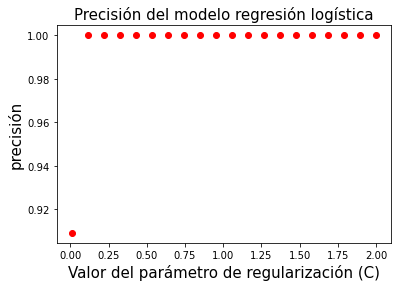

In [10]:
#Se calcula la precisión del modelo con todas las variables
modelos= list()
accuracy = list()


#Se crean los modelos para cada parámetro de regularización C
for i in CC:
    modelos.append(LogisticRegression(penalty = 'l2', C = i, max_iter= 1000))


for modelo in modelos:
    precisionModelo= list()
    for train_index, test_index in loo.split(datasetNormalizado):
        prediccion=modelo.fit(datasetNormalizado[train_index],labels[train_index]).predict(datasetNormalizado[test_index])
        if prediccion != labels[test_index]:
            precisionModelo.append(0)
        else:
            precisionModelo.append(1)
    accuracy.append(sum(precisionModelo)/len(precisionModelo))

#Se crea la gráfica
figRegresionLogistica = plt.figure()
ax1 = figRegresionLogistica.add_subplot(111)
 # Establecer título
ax1.set_title('Precisión del modelo regresión logística', fontsize=15)
 # Establecer etiquetas de eje X
plt.xlabel('Valor del parámetro de regularización (C)', fontsize=15)
 # Establecer etiqueta del eje Y
plt.ylabel('precisión',fontsize=15)

 # Dibujar diagrama de dispersión
ax1.scatter(CC,accuracy,c = 'r',marker = 'o' )
plt.show()

